# Introduction  
The goal of this project is to see if there is a connection between life expectancy and GDP,

meaning if the GDP is on the rise, does the life expectancy changes accordingly? and how? 

GDP is (Gross Domestic Product) is the total monetary value of all goods and services produced within a country's borders in a specific time period.

It’s an indicator of a nation’s economic health and performance. In this data the GDP units are us dollars. 

## Python Modules Import

In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

## Data Loading

Loading the data into dataframe to analyze and visulaize it. The data includes 4 columns : Country name, Year, Life expectancy at birth (years) and GDP. 

In [7]:
df = pd.read_csv('all_data.csv')
df.head() # Display the first few rows of the DataFrame to understand its structure and contents.

,Country,year,life_expectancy,gdp
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


## Data integrity and name refactoring

Making sure all the columns include the same number of values, and display the data types

Renaming columns to simplfy analisys - one word or phrase, small letters only

Renaming United States of America to USA to save space on graphs

In [185]:
df = df.rename(columns={'Country': 'country', 'Year': 'year', 'Life expectancy at birth (years)': 'life_expectancy', 'GDP': 'gdp'})
df['country'] = df['country'].replace('United States of America', 'USA')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          96 non-null     object 
 1   year             96 non-null     int64  
 2   life_expectancy  96 non-null     float64
 3   gdp              96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


## Data Exploration
Checking Which countries exist in the database

In [186]:
countries = df.country.unique()
countries

array(['Chile', 'China', 'Germany', 'Mexico', 'USA', 'Zimbabwe'],
      dtype=object)

Which years does the data represent? 

In [183]:
years = df.year.unique()
years

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015])

## Graph Exploration

C:\Users\Yoav\AppData\Local\Temp\ipykernel_16304\752814155.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='country', y='gdp', palette='muted')


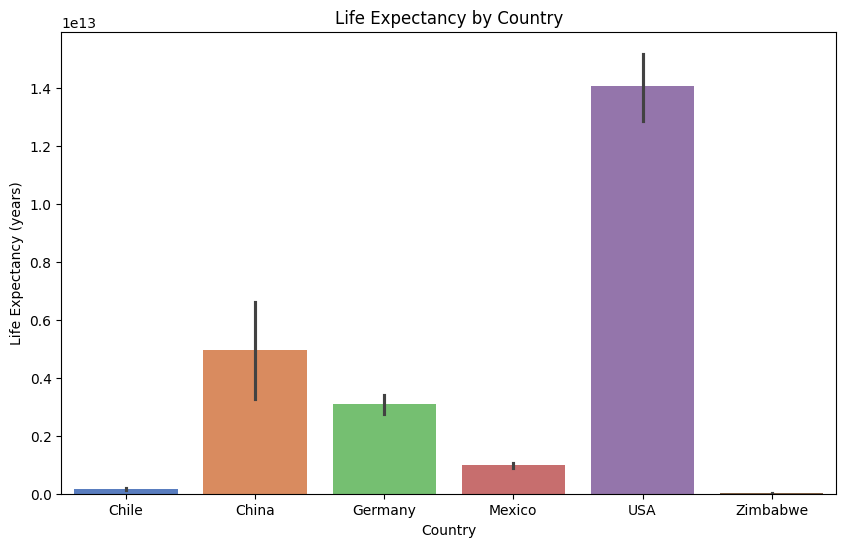

<Figure size 640x480 with 0 Axes>

In [184]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='country', y='gdp', palette='muted')
plt.title('Life Expectancy by Country')
plt.xlabel('Country')
plt.ylabel('Life Expectancy (years)')
plt.show()
plt.clf()

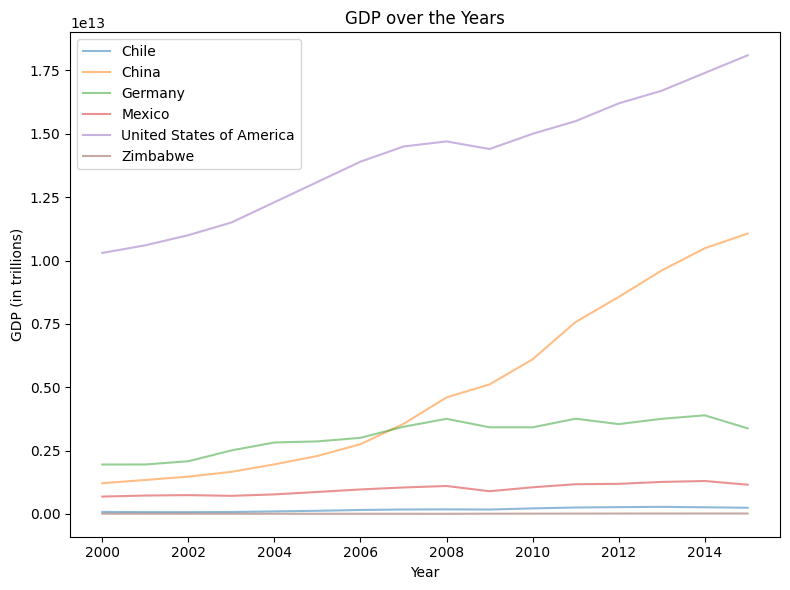

<Figure size 640x480 with 0 Axes>

In [121]:
plt.figure(figsize=(8, 6))
plt.title('GDP over the Years')
sns.lineplot(data=df, x='year', y='gdp', hue='country', alpha=0.5)
plt.xlabel('Year')
plt.ylabel('GDP (in trillions)')
plt.legend(loc='upper left')  
plt.tight_layout()
plt.show()
plt.clf()


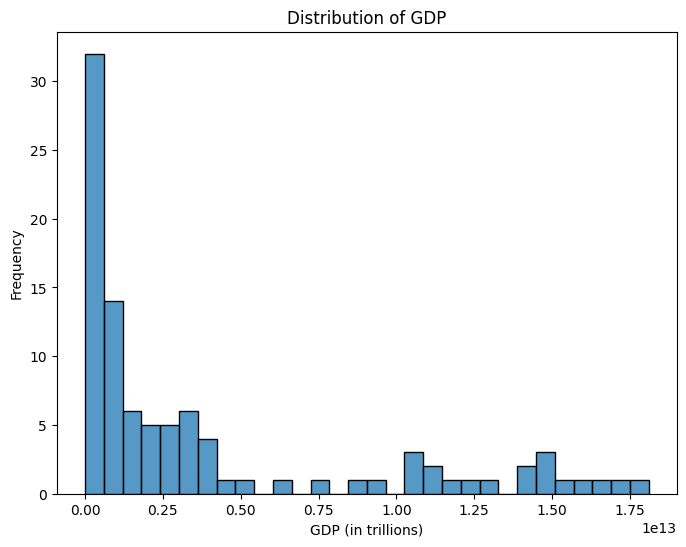

<Figure size 640x480 with 0 Axes>

In [119]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='gdp', bins=30, kde=False)
plt.title('Distribution of GDP')
plt.xlabel('GDP (in trillions)')        
plt.ylabel('Frequency')
plt.show()
plt.clf()

C:\Users\Yoav\AppData\Local\Temp\ipykernel_16304\4091492059.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='country', y='life_expectancy', palette='viridis')


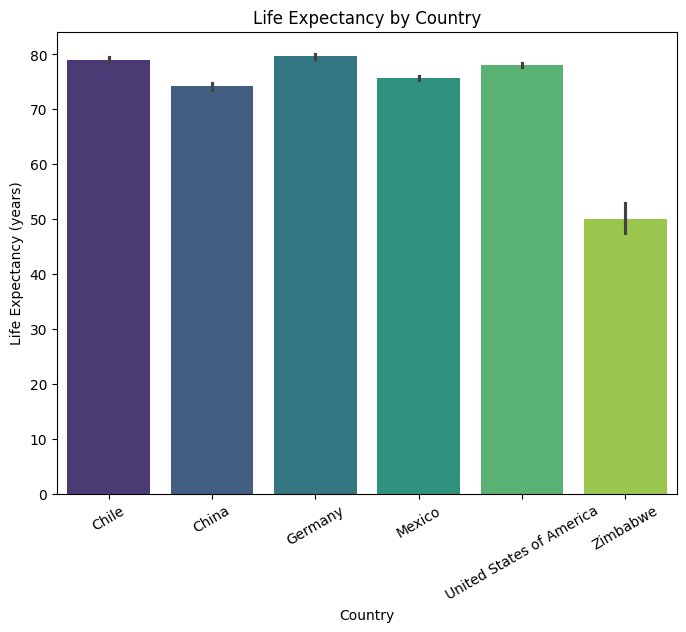

<Figure size 640x480 with 0 Axes>

In [118]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='country', y='life_expectancy', palette='viridis')
plt.title('Life Expectancy by Country')
plt.xlabel('Country')
plt.ylabel('Life Expectancy (years)')
plt.xticks(rotation=30)
plt.show()
plt.clf()


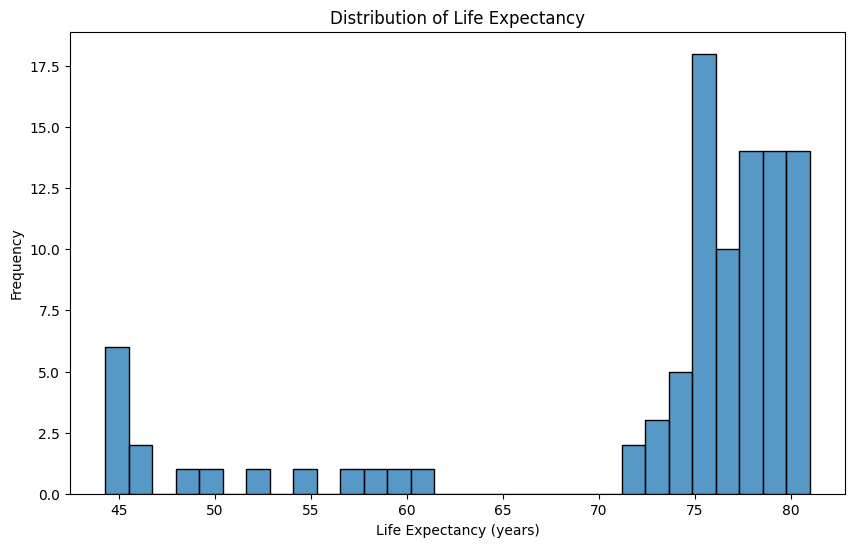

<Figure size 640x480 with 0 Axes>

In [99]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='life_expectancy', bins=30, kde=False)
plt.title('Distribution of Life Expectancy')
plt.xlabel('Life Expectancy (years)')
plt.ylabel('Frequency')
plt.show()
plt.clf()

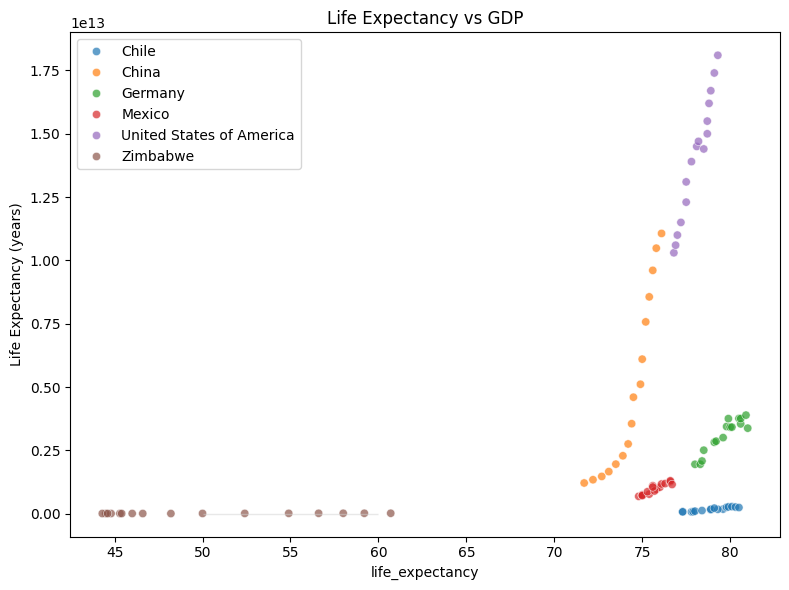

<Figure size 640x480 with 0 Axes>

In [180]:
fig = plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='life_expectancy', y='gdp', markers='o', hue='country', alpha=0.7)
plt.title('Life Expectancy vs GDP')
plt.fill_betweenx(y=[40, 90], x1=50, x2=60, color='lightgray', alpha=0.5)
plt.ylabel('Life Expectancy (years)')       
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
plt.clf()

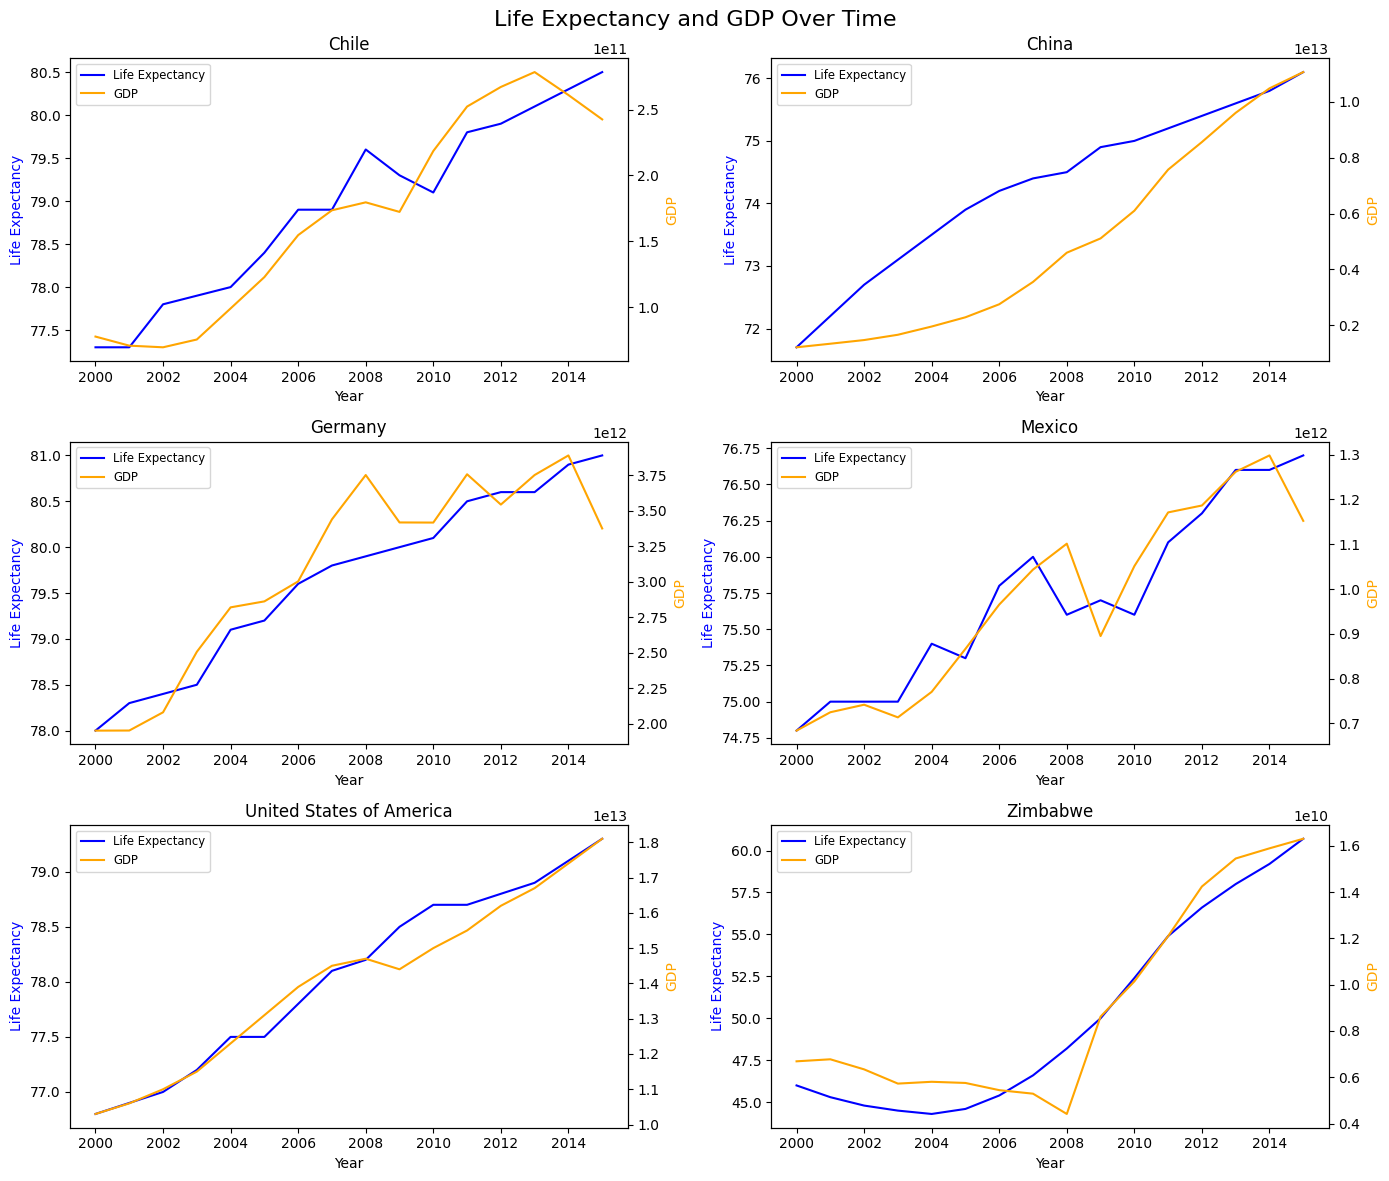

In [154]:
# Create 3x2 grid
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
fig.suptitle('Life Expectancy and GDP Over Time', fontsize=16)
axes = axes.flatten()

# Loop through countries and plot
for i, country in enumerate(countries):
    data = df[df['country'] == country]
    ax1 = axes[i]
    ax2 = ax1.twinx()

    # Plot using matplotlib for better control
    line1, = ax1.plot(data['year'], data['life_expectancy'], color='blue', label='Life Expectancy')
    line2, = ax2.plot(data['year'], data['gdp'], color='orange', label='GDP')

    # Add combined legend to ax1
    ax1.legend(handles=[line1, line2], loc='upper left', fontsize='small')

    # Titles and labels
    ax1.set_title(country)
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Life Expectancy', color='blue')
    ax2.set_ylabel('GDP', color='orange')

# Tidy up layout
plt.tight_layout()
plt.show()

##4. Show average GDP and life expectancy for each country over the whole period.
Visualize with a bar plot or table.



### 4.analysis of results 


##3. Country Specific trends over the years 
#show if changes in several countries 
- line plots and analysis 

do plot for each counrty over the years to see connection between gdp and life expectancy 

## 5. conclusions 
